In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data=pd.read_csv(r'C:\Users\stc\Documents\Project\4th Project\news.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
data.shape

(6335, 4)

In [9]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [11]:
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


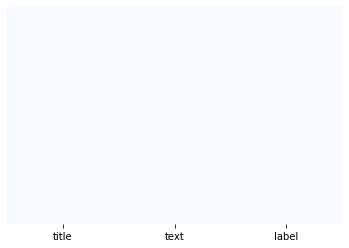

In [12]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")
# to show if any data is null or if there is any missing values for an array-like object.

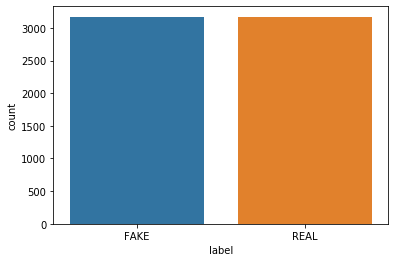

In [13]:
sns.countplot(data['label'], label = 'Count')


In [14]:
data['length'] = data['title'].apply(len)

In [15]:
data

,title,text,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67


In [16]:
data['textLen']=data['text'].apply(len)

In [17]:
data


,title,text,label,length,textLen
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69,4076
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14323
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66,11974
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,6991


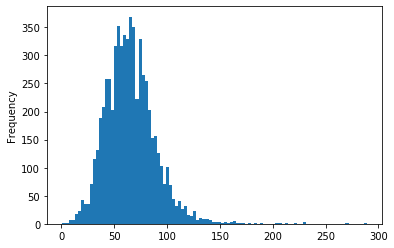

In [18]:
data['length'].plot(bins=100, kind='hist') 


In [19]:
data.describe()

,length,textLen
count,6335.000000,6335.000000
mean,65.277664,4707.250355
std,23.733657,5090.956446
min,1.000000,1.000000
25%,49.000000,1741.500000
50%,64.000000,3642.000000
75%,78.000000,6192.000000
max,289.000000,115372.000000


In [20]:
data[data['length'] == 28]['title'].iloc[0]


'You Can Smell Hillary’s Fear'

In [21]:
data[data['length'] ==28 ]['text'].iloc[0]


'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [22]:
real = data[data['label']=='REAL']

In [23]:
real


,title,text,label,length,textLen
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,783
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,13863
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,4296
...,...,...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,90,1822
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,62,2212
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69,4076
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,6991


In [24]:
fake = data[data['label']=='FAKE']

In [25]:
fake

,title,text,label,length,textLen
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171
...,...,...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,83,3077
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,73,1
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,64,2572
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14323


In [26]:
sen = data['title'].tolist()

In [27]:
len(sen)

6335

In [28]:
sen

['You Can Smell Hillary’s Fear',
 'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
 'Kerry to go to Paris in gesture of sympathy',
 "Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'",
 'The Battle of New York: Why This Primary Matters',
 'Tehran, USA',
 'Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On',
 '‘Britain’s Schindler’ Dies at 106',
 "Fact check: Trump and Clinton at the 'commander-in-chief' forum",
 'Iran reportedly makes new push for uranium concessions in nuclear talks',
 'With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton’s campaign',
 'Donald Trump’s Shockingly Weak Delegate Game Somehow Got Even Worse',
 'Strong Solar Storm, Tech Risks Today | S0 News Oct.26.2016 [VIDEO]',
 '10 Ways America Is Preparing for World War 3',
 'Trump takes on Cruz, but lightly',
 'How women lead differently',
 'Shocking! Michele Obama & Hillary Caught Glamor

In [29]:
join_sen = " ".join(sen)


In [30]:
join_sen

'You Can Smell Hillary’s Fear Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO) Kerry to go to Paris in gesture of sympathy Bernie supporters on Twitter erupt in anger against the DNC: \'We tried to warn you!\' The Battle of New York: Why This Primary Matters Tehran, USA Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On ‘Britain’s Schindler’ Dies at 106 Fact check: Trump and Clinton at the \'commander-in-chief\' forum Iran reportedly makes new push for uranium concessions in nuclear talks With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton’s campaign Donald Trump’s Shockingly Weak Delegate Game Somehow Got Even Worse Strong Solar Storm, Tech Risks Today | S0 News Oct.26.2016 [VIDEO] 10 Ways America Is Preparing for World War 3 Trump takes on Cruz, but lightly How women lead differently Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters Hillary Clinton in HUGE Trouble Aft

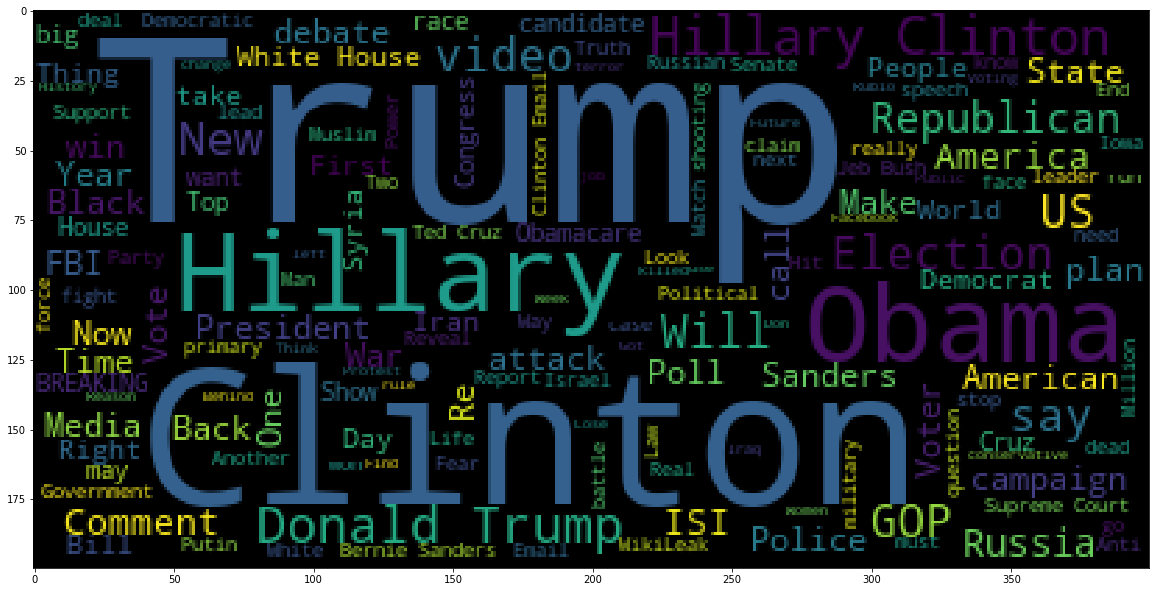

In [31]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(join_sen))


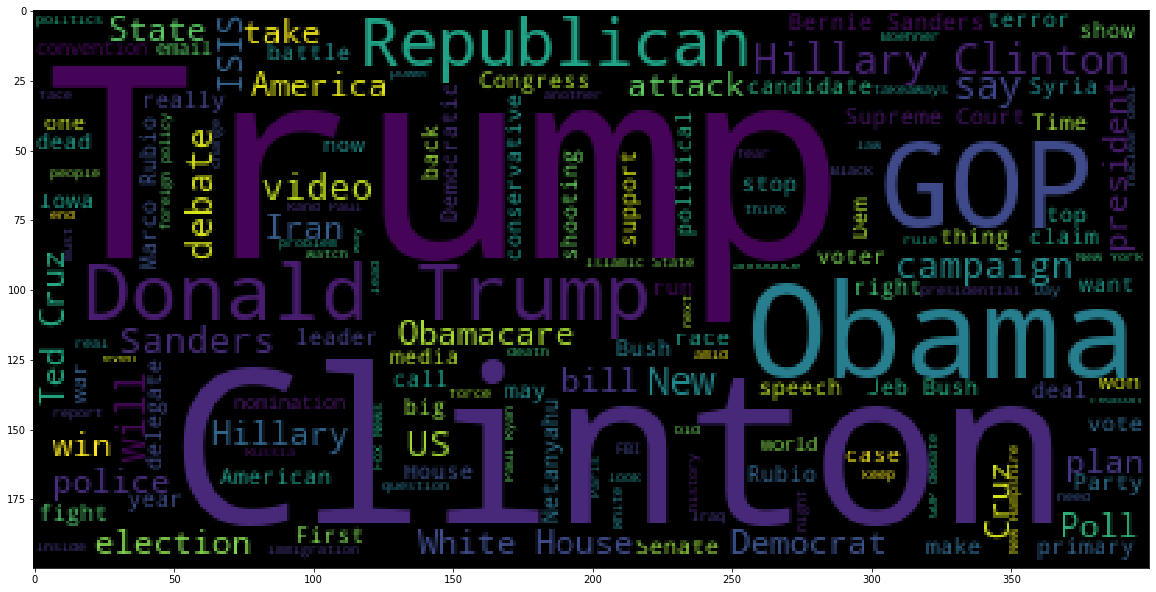

In [32]:
real_lst = real['title'].tolist()
real_sent= " ".join(real_lst)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(real_sent))

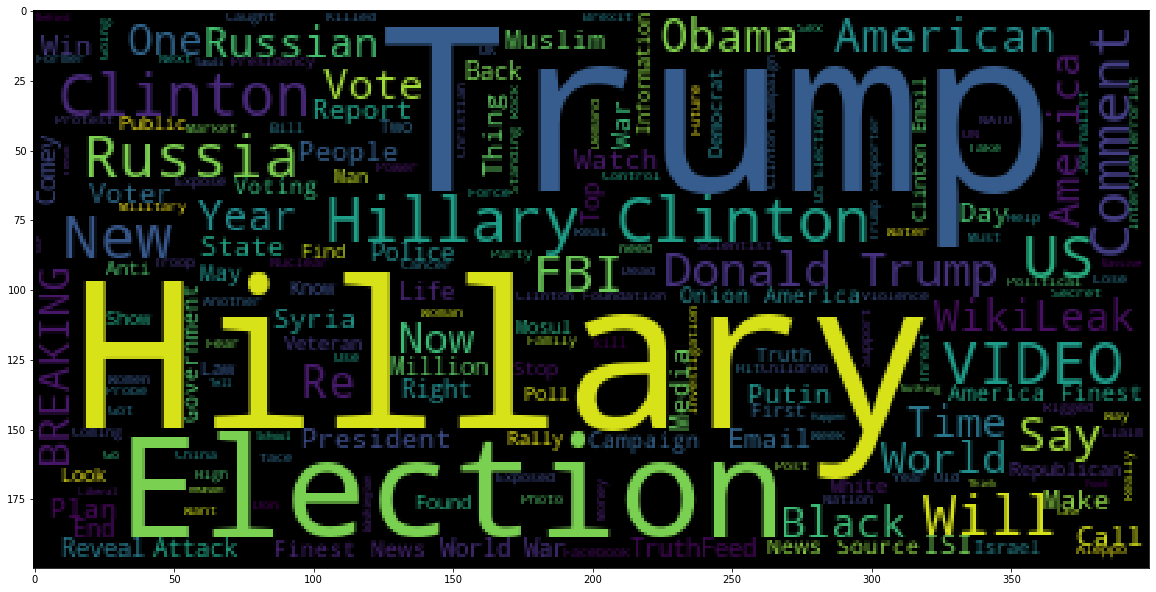

In [33]:
fake_lst = fake['title'].tolist()
fake_sent= " ".join(fake_lst)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(fake_sent))

In [34]:
data

,title,text,label,length,textLen
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,69,4076
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14323
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,66,11974
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,67,6991


In [35]:
data.drop(data.columns[[3,4]], axis=1, inplace=True)

In [36]:
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [37]:
fake.drop(fake.columns[[3,4]], axis=1, inplace=True)

C:\Users\stc\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
fake

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [39]:
real.drop(real.columns[[3,4]], axis=1, inplace=True)
#These are just warnings stating that the changes that we expected might have not occured so we need to check

C:\Users\stc\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
real
#here we can see our operation was successful

,title,text,label
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [41]:
labels=data.label
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [42]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [43]:
#Passive Agressive Classifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)

In [44]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


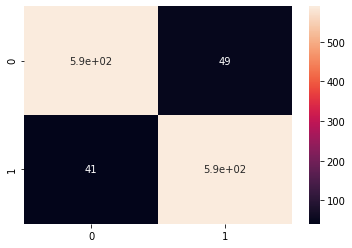

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
sns.heatmap(cm, annot=True)

In [46]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(tfidf_train, y_train)
y_predict = NB_classifier.predict(tfidf_test)


In [47]:
scr=accuracy_score(y_test,y_predict)
print(f'Accuracy: {round(scr*100,2)}%')

Accuracy: 84.06%


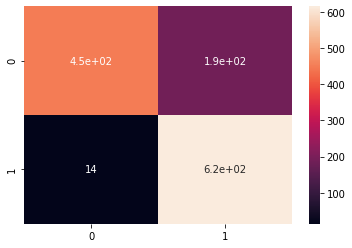

In [48]:
cmat = confusion_matrix(y_test, y_predict, labels=['FAKE','REAL'])
sns.heatmap(cmat, annot=True)

In [52]:
#Logistic Regression
model = LogisticRegression()
model.fit(tfidf_train, y_train)
predicted_classes = model.predict(tfidf_test)


In [53]:
ac_sc=accuracy_score(y_test,predicted_classes)
print(f'Accuracy: {round(ac_sc*100,2)}%')

Accuracy: 91.71%


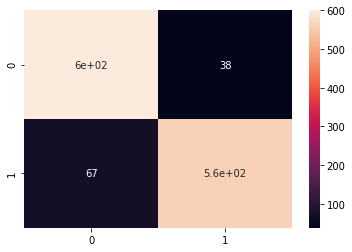

In [54]:
cmatrix = confusion_matrix(y_test, predicted_classes, labels=['FAKE','REAL'])
sns.heatmap(cmatrix, annot=True)

In [58]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfidf_vectorizer.transform(input_data)
    prediction = pac.predict(vectorized_input_data)
    print(prediction)

In [59]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [61]:
import pickle
pickle.dump(pac,open('Model.pkl', 'wb'))